In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. ML with pre-trained and fine-tuned BioBERT accuracies

In [2]:
# Read validation data
df_val_ml = pd.read_csv('data/ML_best_model_parameters.csv')
df_val_ml_bb = pd.read_csv('data/ML_BioBERT_finetuned_best_model_parameters.csv')

In [3]:
# Get the accuracy of the best model from the ML validation data
models = df_val_ml['Model']
ml_accuracy = df_val_ml['Best Accuracy']

# Get the accuracy of the best model from the ML BioBERT validation data
ml_bb_accuracy = df_val_ml_bb['Best Accuracy']

In [4]:
# Create a dataframe to store the accuracies
df_accuracy = pd.DataFrame({
    'Model': models,
    'ML Accuracy': ml_accuracy,
    'ML BioBERT Accuracy': ml_bb_accuracy
})

In [5]:
df_accuracy

,Model,ML Accuracy,ML BioBERT Accuracy
0,LR,0.842640,0.928934
1,SVM,0.838198,0.930203
2,KNN,0.777919,0.930203
3,RF,0.755076,0.932107


In [6]:
# Multiply the accuracies by 100 to convert them to percentages
df_accuracy[['ML Accuracy', 'ML BioBERT Accuracy']] *= 100

In [7]:
df_accuracy

,Model,ML Accuracy,ML BioBERT Accuracy
0,LR,84.263959,92.893401
1,SVM,83.819797,93.020305
2,KNN,77.791878,93.020305
3,RF,75.507614,93.210660


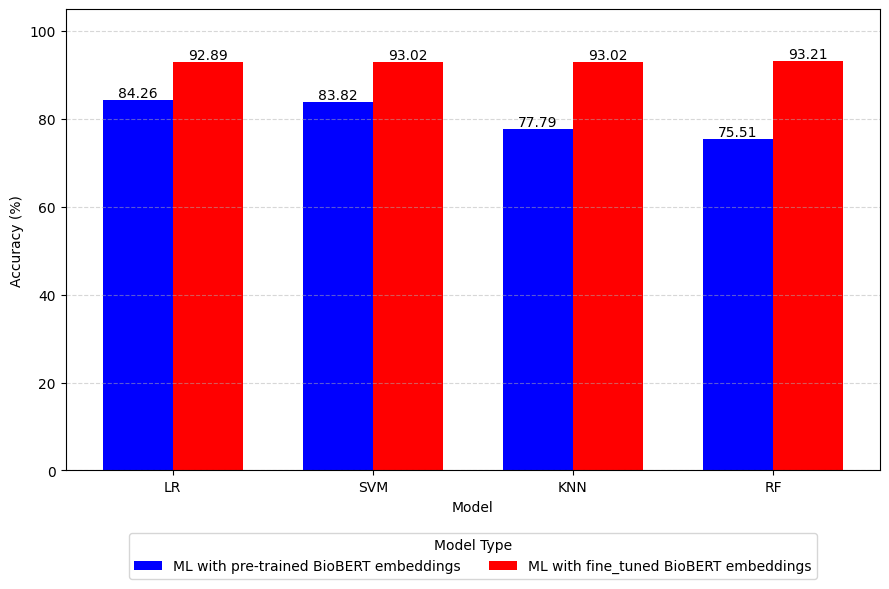

In [8]:
# Bar positions
x = np.arange(len(df_accuracy['Model']))  
width = 0.35  

# Plotting
plt.figure(figsize=(9, 6))
plt.bar(x - width/2, df_accuracy['ML Accuracy'], width, label='ML with pre-trained BioBERT embeddings', color='blue')
plt.bar(x + width/2, df_accuracy['ML BioBERT Accuracy'], width, label='ML with fine_tuned BioBERT embeddings', color='red')

# Labels and legend
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(x, df_accuracy['Model'])
plt.ylim(0, 105)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with accuracy values
for i in range(len(df_accuracy)):
    plt.text(x[i] - width/2, df_accuracy['ML Accuracy'][i] + 0.01, f'{df_accuracy['ML Accuracy'][i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + width/2, df_accuracy['ML BioBERT Accuracy'][i] + 0.01, f'{df_accuracy['ML BioBERT Accuracy'][i]:.2f}', ha='center', va='bottom')

# Move legend to the bottom
plt.legend(title='Model Type', loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)

plt.tight_layout()

# Show the plot
plt.show()

### 2. ML and Ensemble accuracies in cross-validation and test prediction

In [9]:
# Read prediction data
df_pred_ml_bb = pd.read_csv('data/4.3 BioBERT_finetuned_ML_predictions.csv')
df_pred_ensemble = pd.read_csv('data/4.4 BioBERT_finetuned_Ensemble_prediction.csv')

# Merge predictions data into one
df_pred = pd.merge(df_pred_ml_bb, df_pred_ensemble, on='pt', how='inner')

In [10]:
# Read gpt generated data
df_gpt = pd.read_csv('data/meddra_soc_classification_gpt_42.csv')

# Rename columns for merging
df_gpt = df_gpt.rename(columns={'Preferred Term': 'pt', 'Primary SOC': 'SOC_primary_gpt', 'Secondary SOC': 'SOC_secondary_gpt'})

# Merge gpt data with predictions data
df_gpt_merged = pd.merge(df_gpt, df_pred, on='pt', how='left')

In [11]:
# Create a function to check if the model's prediction matches the gpt generated SOC
def add_check_column(df, model_col, primary_col='SOC_primary_gpt', secondary_col='SOC_secondary_gpt'):
    check_col = 'Check_' + model_col.split('SOC_')[-1]
    df[check_col] = np.where(
        (df[model_col].str.lower() == df[primary_col].str.lower()) | 
        (df[model_col].str.lower() == df[secondary_col].str.lower()),
        1, 0
    )
    return check_col, df

In [12]:
cols_to_check = ['SOC_lr_bb', 'SOC_knn_bb', 'SOC_svm_bb', 'SOC_rf_bb', 'SOC_ensemble_biobert']

for col in cols_to_check:
    check_col, df_gpt_merged = add_check_column(df_gpt_merged, col)
    print(f'Accuracy for {col}: {df_gpt_merged[check_col].mean():.1%}')

Accuracy for SOC_lr_bb: 70.0%
Accuracy for SOC_knn_bb: 71.0%
Accuracy for SOC_svm_bb: 69.0%
Accuracy for SOC_rf_bb: 71.0%
Accuracy for SOC_ensemble_biobert: 71.0%


In [13]:
df_gpt_merged.head(5)

,pt,SOC_primary_gpt,SOC_secondary_gpt,SOC,SOC_lr_bb,SOC_svm_bb,SOC_knn_bb,SOC_rf_bb,SOC_ensemble_biobert,Check_lr_bb,Check_knn_bb,Check_svm_bb,Check_rf_bb,Check_ensemble_biobert
0,aneurysm,Vascular disorders,Cardiac disorders,NaN,Vascular disorders,Vascular disorders,Vascular disorders,Vascular disorders,Vascular disorders,1,1,1,1,1
1,cryptitis,Gastrointestinal disorders,NaN,NaN,Gastrointestinal disorders,Gastrointestinal disorders,Gastrointestinal disorders,Gastrointestinal disorders,Gastrointestinal disorders,1,1,1,1,1
2,autoinflammatory disease,Immune system disorders,Musculoskeletal and connective tissue disorders,NaN,Immune system disorders,Immune system disorders,Immune system disorders,Immune system disorders,Immune system disorders,1,1,1,1,1
3,crown lengthening,Surgical and medical procedures,NaN,NaN,Musculoskeletal and connective tissue disorders,Musculoskeletal and connective tissue disorders,General disorders and administration site cond...,Gastrointestinal disorders,Gastrointestinal disorders,0,0,0,0,0
4,tachypnoea,"Respiratory, thoracic and mediastinal disorders",NaN,NaN,"Respiratory, thoracic and mediastinal disorders","Respiratory, thoracic and mediastinal disorders","Respiratory, thoracic and mediastinal disorders","Respiratory, thoracic and mediastinal disorders","Respiratory, thoracic and mediastinal disorders",1,1,1,1,1


In [14]:
check_dict = {
    'LR': df_gpt_merged['Check_lr_bb'].mean() * 100,
    'SVM': df_gpt_merged['Check_svm_bb'].mean() * 100,
    'KNN': df_gpt_merged['Check_knn_bb'].mean() * 100,
    'RF': df_gpt_merged['Check_rf_bb'].mean() * 100,
    'Voting Ensemble': df_gpt_merged['Check_ensemble_biobert'].mean() * 100,
}

In [15]:
# Get the accuracy of the voting ensemble
ensemble_accuracy = None
with open('data/Voting_ensemble_results.txt', 'r') as f:
    for line in f:
        if 'Voting Ensemble Accuracy:' in line:
            # Extract the numeric value from the line
            ensemble_accuracy = float(line.strip().split(':')[-1])
            break

In [16]:
# Add the ensemble accuracy to the dataframe
models_2 = models.copy()
models_2.loc[4] = 'Voting Ensemble'

accuracies = ml_bb_accuracy.copy()
accuracies = pd.concat([accuracies, pd.Series([ensemble_accuracy], index=[4])], ignore_index=True)

In [17]:
# Create a dataframe to store the accuracies
df_ml_ensemble_accuracy = pd.DataFrame({
    'Model': models_2,
    'Validation accuracy': accuracies
})

# Multiply the accuracies by 100 to convert them to percentages
df_ml_ensemble_accuracy['Validation accuracy'] = (df_ml_ensemble_accuracy['Validation accuracy'] * 100).round(1)

# Add the predicted accuracies from the check_dict
df_ml_ensemble_accuracy['Prediction accuracy'] = df_ml_ensemble_accuracy['Model'].map(check_dict)

In [18]:
df_ml_ensemble_accuracy

,Model,Validation accuracy,Prediction accuracy
0,LR,92.9,70.0
1,SVM,93.0,69.0
2,KNN,93.0,71.0
3,RF,93.2,71.0
4,Voting Ensemble,93.1,71.0


### 3. Apply to all unmapped SOCs

In [19]:
# Load data
df = pd.read_csv('data/faers_adalimumab_2020-2024_ungrouped_cleaned_2.csv', low_memory=False)

In [20]:
data = df.copy()

In [21]:
# Create mapping from ensemble predictions
mapping = dict(zip(df_pred_ensemble['pt'], df_pred_ensemble['SOC_ensemble_biobert']))

# Fill missing SOC values in the data with ensemble predictions
data['SOC'] = data['SOC'].fillna(data['pt'].map(mapping))

In [22]:
# Save the final data
data.to_csv('data/faers_adalimumab_2020-2024_ungrouped_cleaned.csv', index=False)